In [0]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt



data = pd.read_csv('employee_data.csv',header=0)
data1=data[['age','healthy_eating','active_lifestyle','salary']]
data1

,id,age,healthy_eating,active_lifestyle,salary
0,0,36,5,5,2297
1,1,55,3,5,1134
2,2,61,8,1,4969
3,3,29,3,6,902
4,4,34,6,2,3574
...,...,...,...,...,...
995,995,33,7,7,2996
996,996,21,1,2,667
997,997,49,9,7,4158
998,998,56,6,7,2414


In [0]:
from sklearn.preprocessing import StandardScaler
features = ['age','healthy_eating','active_lifestyle','salary']
# Separating out the features
x = data1.loc[:, features].values
x = StandardScaler().fit_transform(x)
print(x)

[[-0.38309303  0.02783053 -0.3335674   0.06440767]
 [ 1.02888904 -0.96611687 -0.3335674  -1.0127738 ]
 [ 1.47477811  1.51875162 -2.28711     2.53923904]
 ...
 [ 0.58299996  2.01572532  0.6432039   1.78808326]
 [ 1.10320388  0.52480423  0.6432039   0.17277417]
 [ 1.69772265 -0.46914317  1.6199752  -1.33324223]]


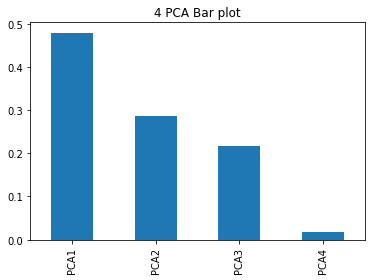

In [0]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
pca.fit(x)
#4D explained value ratio

data3=pca.explained_variance_ratio_
from pandas import Series
s3 = Series(data3, 
            index = ['PCA1','PCA2','PCA3','PCA4'])

s3.plot(kind='bar', title='4 PCA Bar plot')


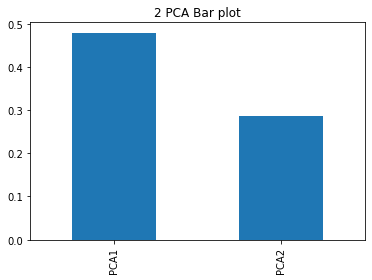

In [0]:
pca1 = PCA(n_components=2)
pca1.fit(x)


#2D explained value ratio

data4=pca1.explained_variance_ratio_
from pandas import Series
s1 = Series(data4, 
            index = ['PCA1', 'PCA2'])

s1.plot(kind='bar', title='2 PCA Bar plot')

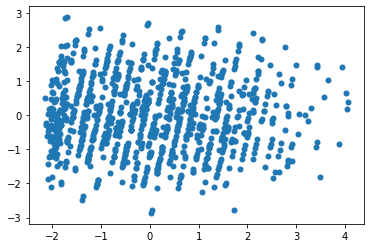

In [0]:
X_new = pca1.transform(x)
plt.scatter(X_new[:, 0], X_new[:, 1],marker='o',linewidths=0.01)
plt.show()

               using K_mean for PCA data


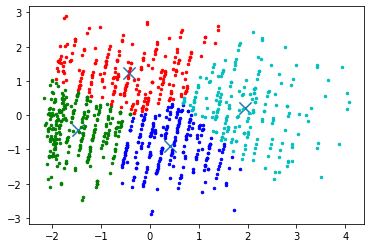

In [0]:
from sklearn.cluster import KMeans
from sklearn.externals import joblib
import numpy

import matplotlib.pyplot as plt
clf = KMeans(n_clusters=4) 
clf.fit(X_new)
centroids = clf.cluster_centers_
labels = clf.labels_ 
colors = ['g.','r.','c.','b.'] 
print("               using K_mean for PCA data")
for i in range(len(X_new)):
    plt.plot(X_new[i][0], X_new[i][1], colors[labels[i]], markersize = 5)
plt.scatter(centroids[:,0], centroids[:,1], marker='x', s=150, linewidths=6) 
plt.show()

             PCA data based on 'groups'


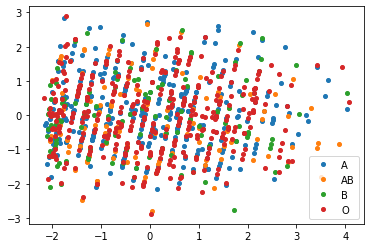

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

labels = data["groups"]
df = pd.DataFrame(dict(x=X_new[:, 0], y=X_new[:, 1], label=labels))

groups = df.groupby('label')

# Plot
fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
print("             PCA data based on 'groups'")
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=4, label=name)
ax.legend()

plt.show()